# DBSCAN

DBSCAN is a density-based clustering algorithm that groups together data points that are close to each other and separates outliers or noise points. Unlike K-means, DBSCAN does not require specifying the number of clusters in advance and can discover clusters of arbitrary shapes. It is especially useful when dealing with datasets with varying densities and noise.

DBSCAN categorizes data points into three categories:

- **Core Points:** Data points that have at least minPts data points within their epsilon neighborhood.
- **Border Points:** Data points that have fewer than minPts data points within their epsilon neighborhood but are reachable from core points.
- **Noise Points:** Data points that are neither core points nor reachable from core points.

## Distance Threshold and Minimum Number of Points
###  Distance Threshold (epsilon):
The distance threshold, often denoted as epsilon (ε), defines the maximum distance between two points for them to be considered neighbors. It determines the neighborhood size around each point. Points within this distance are considered part of the same cluster.

- If epsilon is too small, the algorithm may classify most points as noise and fail to form meaningful clusters.
- If epsilon is too large, points from different clusters may be connected, leading to the formation of a single large cluster or a few clusters.

Choosing an appropriate epsilon depends on the density of the data and the inherent structure of the dataset. It is usually determined by analyzing the k-dist graph or using domain knowledge.

### Minimum Number of Points (minPts):
The minimum number of points, denoted as minPts, defines the minimum number of neighboring points within the epsilon distance to consider a point as a core point.

- Points that have at least minPts neighbors within their epsilon distance are classified as core points.
- Points that have fewer than minPts neighbors within their epsilon distance are classified as border points.
- Points that do not satisfy the criteria of core or border points are classified as noise points.

The choice of minPts is essential for differentiating noise points from meaningful clusters and for determining the density required to form a cluster. A larger minPts value typically results in fewer clusters being formed.

To determine the optimal values for epsilon and minPts, various techniques can be employed, such as Knee Method and Silhouette Analysis.

It's important to note that the optimal values for epsilon and minPts may vary depending on the dataset and the specific problem at hand. It is recommended to experiment with different values and evaluate the clustering results using appropriate evaluation metrics.

Let's delve into the steps of the DBSCAN algorithm:

**Step 1: Input Parameters**
- Choose the distance threshold (epsilon) and the minimum number of points (minPts).

**Step 2: Neighborhood Search**
- For each data point, calculate the distance to all other data points.
- Identify the data points within the distance of epsilon as neighbors of each point.

**Step 3: Core Point Identification**
- Identify core points that have at least minPts data points within their epsilon neighborhood.

**Step 4: Cluster Expansion**
- Connect core points to their reachable neighbors.
- Assign the reachable neighbors as part of the same cluster.

**Step 5: Border Points Assignment**
- Assign border points to the clusters.

**Step 6: Repeat**
- Repeat steps 2-5 until all data points are processed.

## Determining the Optimal Parameters

Finding the optimal values for epsilon and minPts is crucial for successful DBSCAN clustering. Here are a few approaches to determine the optimal parameters:

### Knee Method:

The knee method helps identify the optimal value of epsilon by analyzing the sorted k-dist graph. Here's how it works:

- **Step 1:** Calculate the k-distance of each data point, where `k` is the number of nearest neighbors.
- **Step 2:** Sort the k-dist values in ascending order.
- **Step 3:** Plot the sorted k-dist graph, with the x-axis representing the data points and the y-axis representing the corresponding k-dist values.
- **Step 4:** Examine the graph and look for a "knee" or an abrupt change in the slope.
- **Step 5:** The distance corresponding to the knee in the graph can be considered as the optimal value for epsilon.

The knee method helps determine a suitable value for epsilon by finding the point of maximum curvature in the k-dist graph. This point represents a significant change in the density or distance distribution of the data points and is indicative of the natural clustering structure.

### Silhouette Analysis

Silhouette analysis is another technique for selecting the optimal values of epsilon and minPts based on the average silhouette coefficient. The silhouette coefficient measures the compactness and separation of clusters. Here's how to perform silhouette analysis:

- **Step 1:** For each combination of epsilon and minPts, apply DBSCAN clustering to the dataset.
- **Step 2:** Calculate the silhouette coefficient for each data point.
- **Step 3:** Compute the average silhouette coefficient for the entire dataset.
- **Step 4:** Repeat steps 1-3 for different combinations of epsilon and minPts.
- **Step 5:** Select the combination of epsilon and minPts that maximizes the average silhouette coefficient.

The average silhouette coefficient ranges from -1 to 1. Higher values indicate better clustering, with values close to 1 suggesting well-separated and compact clusters.

By systematically varying the values of epsilon and minPts and computing the average silhouette coefficient, you can determine the combination that results in the highest silhouette coefficient. This combination represents the optimal parameters for DBSCAN clustering.

Both the knee method and silhouette analysis provide valuable insights into selecting suitable values for epsilon and minPts in DBSCAN clustering. It is recommended to use a combination of these techniques and domain knowledge to find the best parameter values that capture the inherent structure of the data.

## Evaluation Metrics
Evaluation metrics can help assess the quality of the clustering results. Two common evaluation metrics for DBSCAN are:

### Silhouette Coefficient

- Silhouette coefficient measures how well each sample fits within its cluster.
- It ranges from -1 to 1, where higher values indicate better clustering.
- A value close to 1 indicates that the samples are well-clustered, while a value close to -1 suggests that they may be assigned to the wrong cluster.

### Adjusted Rand Index (ARI)

The Adjusted Rand Index (ARI) is an evaluation metric used to measure the similarity between the true class labels and the clusters obtained from a clustering algorithm, such as DBSCAN. It quantifies the agreement between the clustering results and the ground truth labels, providing a value between -1 and 1, where higher values indicate better clustering performance.

The ARI considers all pairs of samples and counts four types of agreements: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). Based on these counts, it calculates a similarity measure that takes into account the expected agreements due to randomness. The formula for the Adjusted Rand Index is as follows:

\begin{equation}
ARI = \frac{TP+TN}{TP+FP+FN+TN} - \frac{(A+B)⋅(A+C)+(C+D)⋅(B+D)}{TP+FP+FN+TN}
\end{equation}

Here, A represents the number of pairs of samples that are in the same cluster in both the true labels and the predicted clusters, B represents the number of pairs that are in different clusters in the predicted clusters but in the same cluster in the true labels, C represents the number of pairs that are in the same cluster in the predicted clusters but in different clusters in the true labels, and D represents the number of pairs that are in different clusters in both the true labels and the predicted clusters.

The Adjusted Rand Index ranges from -1 to 1:

- ARI = 1 indicates a perfect clustering, where the clustering results perfectly match the true labels.
- ARI = 0 indicates that the clustering results are no better than random assignments.
- ARI = -1 indicates a complete mismatch between the clustering results and the true labels.

The Adjusted Rand Index is commonly used in clustering tasks, including DBSCAN, to evaluate the quality of the clustering results without relying on the specific class labels. It provides a measure of how well the clustering algorithm captures the underlying structure of the data.

When using DBSCAN, you can compute the ARI by comparing the predicted cluster labels obtained from the algorithm with the true class labels of the dataset. Higher ARI values indicate a better alignment between the clusters and the ground truth.

Keep in mind that the ARI requires the availability of true class labels for evaluation, which may not always be the case in unsupervised scenarios.

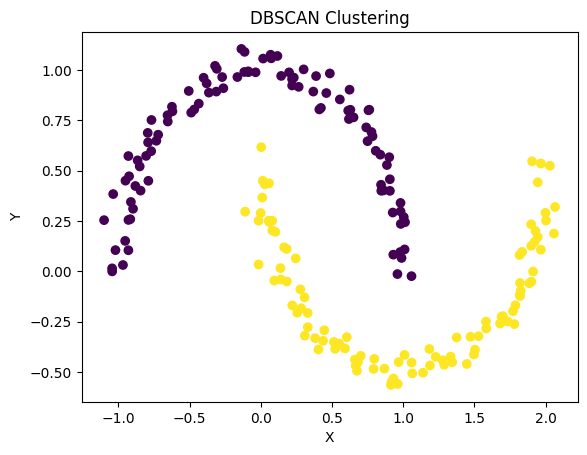

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generating Synthetic Data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Preprocessing Data
# No preprocessing required for this example

# Implementing DBSCAN Clustering
epsilon = 0.3  # Distance threshold
minPts = 5  # Minimum number of points
dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
dbscan.fit(X)

# Visualizing Clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## References

- [Scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
- [DBSCAN Algorithm: Complete Guide and Application with Python Scikit-Learn](https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d)
- [How to Master the Popular DBSCAN Clustering Algorithm for Machine Learning](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)